<a href="https://colab.research.google.com/github/JGH94/Python_BIT_USA/blob/main/Python_BIT_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pushd book-materials
# 참고 https://github.com/wesm/pydata-book
# 셋팅
from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
import json
from collections import Counter

plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

[Errno 2] No such file or directory: 'book-materials'
/content


In [3]:
path = "/content/sample_data/example.txt" 
print(open(path).readline())
records = [json.loads(line) for line in open(path)] # json 형태로 변환
# 표준 시간대(tz)의 빈도를 구함
time_tz = [rec['tz'] for rec in records if 'tz' in rec]
print(time_tz[:10])
# New_York 시간이 표준 시간대로 가장 많이 사용
# 값이 존재하지 않는것이 521개 
counts_ = Counter(time_tz) 
for x ,y in counts_.most_common(10):
  print(x , y);

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }

['America/New_York', 'America/Denver', 'America/New_York', 'America/Sao_Paulo', 'America/New_York', 'America/New_York', 'Europe/Warsaw', '', '', '']
America/New_York 1251
 521
America/Chicago 400
America/Los_Angeles 382
America/Denver 191
Europe/London 74
Asia/Tokyo 37
Pacific/Honolulu 36
Europe/Madrid 35
America/Sao_Paulo 33


In [4]:
# 간단한 방법
data_ = pd.DataFrame(records)
data_.info()
print('-----------------------------')
print(data_['tz'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

([<matplotlib.axis.YTick at 0x7f341af64590>,
 [Text(0, 0, 'America/New_York'),
  Text(0, 0, 'Unknown'),
  Text(0, 0, 'America/Chicago'),
  Text(0, 0, 'America/Los_Angeles'),
  Text(0, 0, 'America/Denver'),
  Text(0, 0, 'Missing'),
  Text(0, 0, 'Europe/London'),
  Text(0, 0, 'Asia/Tokyo'),
  Text(0, 0, 'Pacific/Honolulu'),
  Text(0, 0, 'Europe/Madrid')])

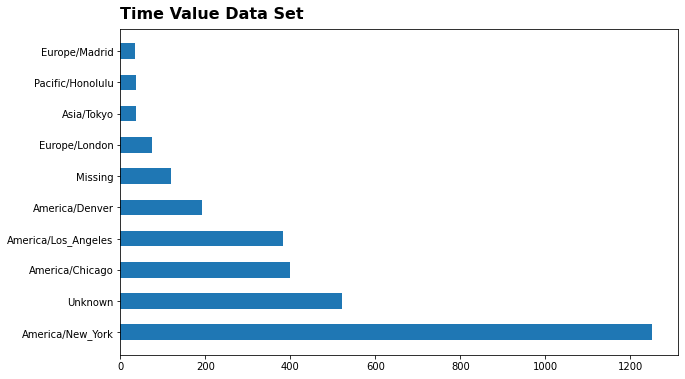

In [5]:
# 없는 값의 Column을 Unknown으로 설정하고
# 데이터 시각화 
new_data= data_['tz'].fillna('Missing')
new_data[new_data == ''] = 'Unknown'
new_data_count = new_data.value_counts() 
X_ = []
Y_ = []
for x,y in new_data_count[:10].items():
  X_.append(x)
  Y_.append(y)  
x = np.arange(10)
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.barh(x, Y_, height = 0.5)  
plt.title('Time Value Data Set ', fontdict=title_font, loc='left', pad=10)
plt.yticks(x, X_)

Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2
GoogleMaps/RochesterNY
Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1
----------------------------------------------------
Mozilla/5.0                   2594
Mozilla/4.0                    601
GoogleMaps/RochesterNY         121
Opera/9.80                      34
TEST_INTERNET_AGENT             24
                              ... 
SAMSUNG-SGH-A887/A887UCIJ1       1
BlackBerry9530/5.0.0.328         1
BlackBerry8520/5.0.0.1067        1
NokiaC3-00/5.0                   1
BlackBerry9700/5.0.0.862         1
Length: 36, dtype: int64


([<matplotlib.axis.YTick at 0x7f341a9b5cd0>,
 [Text(0, 0, 'Mozilla/5.0'),
  Text(0, 0, 'Mozilla/4.0'),
  Text(0, 0, 'GoogleMaps/RochesterNY'),
  Text(0, 0, 'Opera/9.80'),
  Text(0, 0, 'TEST_INTERNET_AGENT'),
  Text(0, 0, 'GoogleProducer'),
  Text(0, 0, 'Mozilla/6.0'),
  Text(0, 0, 'BlackBerry8520/5.0.0.681'),
  Text(0, 0, 'BlackBerry8520/5.0.0.592'),
  Text(0, 0, 'Dalvik/1.4.0')])

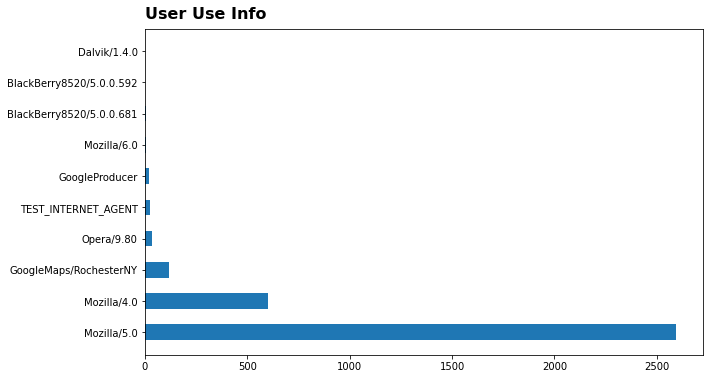

In [6]:
# 사용자 브라우저, 단말기, 애플리케이션 정보
print(data_['a'][50])
print(data_['a'][1])
print(data_['a'][51])
print('----------------------------------------------------')
data_set = pd.Series([x.split()[0] for x in data_.a.dropna()])
print(data_set.value_counts())
new_data_count = data_set.value_counts()  
X_ = []
Y_ = []
for x,y in new_data_count[:10].items():
  X_.append(x)
  Y_.append(y)  
x = np.arange(10)
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.barh(x, Y_, height = 0.5)  
plt.title('User Use Info ', fontdict=title_font, loc='left', pad=10)
plt.yticks(x, X_)

In [115]:
# os Windows 사용 여부 확인
os_data = data_[data_.a.notnull()] 
os_data['os'] = np.where(os_data['a'].str.contains('Windows'),'Windows', 'NotWindows')  
# 운영시간대, 운영체제 기준
by_tz_os = os_data.groupby(['tz','os']) 
use_data = by_tz_os.size().unstack().fillna(0)
print(use_data[:10])
print('----------------------------------------------------------------')
# 전체 표준시간대 순위
indexer = use_data.sum(1).argsort()
print(indexer[:10])
print('----------------------------------------------------------------')
# 정렬을 해볼까
count_sub = use_data.take(indexer[-10:])
print(count_sub[:10])
count_sub.sum(1).nlargest(10)
print('----------------------------------------------------------------') 
count_sub = count_sub.stack()
count_sub.name = 'Total'
count_sub = count_sub.reset_index()
print(count_sub[:10])


os                              NotWindows  Windows
tz                                                 
                                     245.0    276.0
Africa/Cairo                           0.0      3.0
Africa/Casablanca                      0.0      1.0
Africa/Ceuta                           0.0      2.0
Africa/Johannesburg                    0.0      1.0
Africa/Lusaka                          0.0      1.0
America/Anchorage                      4.0      1.0
America/Argentina/Buenos_Aires         1.0      0.0
America/Argentina/Cordoba              0.0      1.0
America/Argentina/Mendoza              0.0      1.0
----------------------------------------------------------------
tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Arge

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


----------------------------------------------------------------
----------------------------------------------------------------


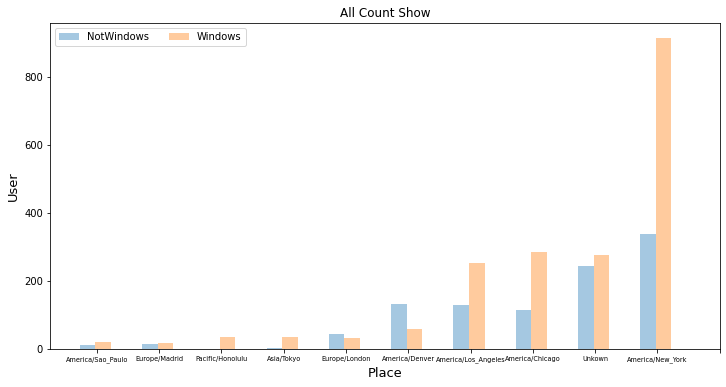

----------------------------------------------------------------


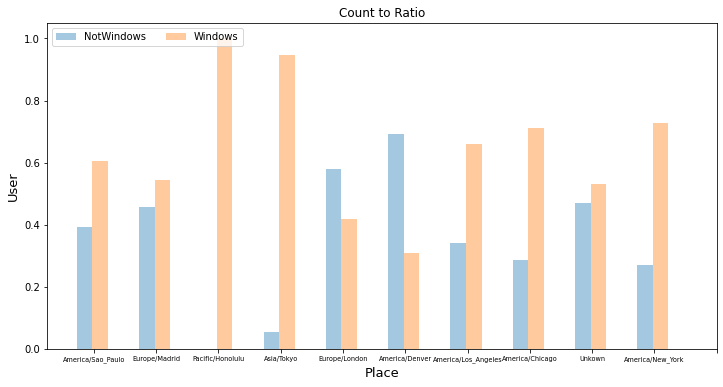

In [121]:
x = np.arange(10) 
y = np.arange(10)   
# 중복 제거와 Unkown 설정
result1 = dict.fromkeys(count_sub['tz'])  
result2 = list(result1) 
result2 = [x if x != '' else 'Unkown' for x in result2] 
print('----------------------------------------------------------------') 
X_list = count_sub['Total'][0::2]
Y_list = count_sub['Total'][1::2] 
print('----------------------------------------------------------------') 
# 개수를 그대로 보여주며 비율을 나타냄
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25 # 설정해주지 않으면 바가 겹쳐서 보임
plt.bar(x, X_list, bar_width, alpha=0.4)
plt.bar(y+bar_width, Y_list, bar_width, alpha=0.4) 
plt.xticks(np.arange(bar_width-0.1, 10 + bar_width, 1), result2, size = 6.5) 
plt.xlabel('Place',  size = 13)
plt.ylabel('User', size = 13) 
plt.legend(['NotWindows', 'Windows'], loc ='upper left' , ncol = 2)
plt.title('All Count Show')
plt.show() 
print('----------------------------------------------------------------') 
# 해당 개수들을 1의 비율로 설정  후, 값을 적용
def norm_total(group):
  group['B_Total'] = count_sub.Total / group.Total.sum()
  return group 
result_ = count_sub.groupby('tz').apply(norm_total)
X_list = result_['B_Total'][0::2]
Y_list = result_['B_Total'][1::2]  
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25 # 설정해주지 않으면 바가 겹쳐서 보임
plt.bar(x, X_list, bar_width, alpha=0.4)
plt.bar(y+bar_width, Y_list, bar_width, alpha=0.4) 
plt.xticks(np.arange(bar_width-0.1, 10 + bar_width, 1), result2, size = 6.5) 
plt.xlabel('Place',  size = 13)
plt.ylabel('User', size = 13) 
plt.legend(['NotWindows', 'Windows'], loc ='upper left' , ncol = 2)
plt.title('Count to Ratio')
plt.show()